<a href="https://colab.research.google.com/github/ANCAMABEBA/Module17/blob/main/ACM_ComparingClassifiers_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [1]:
17

17

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/bank-additional-full.csv', sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [5]:
# Print value_counts for every column (including NaN), one column at a time
for col in df.columns:
    print("\n" + "="*80)
    print(f"Column: {col}  |  dtype: {df[col].dtype}  |  unique: {df[col].nunique(dropna=False)}")
    print("-"*80)
    print(df[col].value_counts(dropna=False))


Column: age  |  dtype: int64  |  unique: 78
--------------------------------------------------------------------------------
age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
91       2
98       2
95       1
87       1
94       1
Name: count, Length: 78, dtype: int64

Column: job  |  dtype: object  |  unique: 12
--------------------------------------------------------------------------------
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

Column: marital  |  dtype: object  |  unique: 4
--------------------------------------------------------------------------------
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

Column: education  |  dtype: object  |  u

In [6]:
# True missing values (NaN)
na_counts = df.isna().sum().sort_values(ascending=False)
print("--- Missing values (NaN) per column ---")
print(na_counts[na_counts > 0] if (na_counts > 0).any() else "No NaN values found.")



--- Missing values (NaN) per column ---
No NaN values found.


In [7]:
# "Missing-as-token" values in object (string/categorical) columns
missing_tokens = {"unknown", "?", "na", "n/a", "none", "", "null"}

obj_cols = df.select_dtypes(include=["object"]).columns
token_missing = (
    df[obj_cols]
    .apply(lambda s: s.astype(str).str.strip().str.lower().isin(missing_tokens).sum())
    .sort_values(ascending=False)
)

print("\n--- Missing-like token counts (e.g., 'unknown', '?') in object columns ---")
print(token_missing[token_missing > 0] if (token_missing > 0).any() else "No missing-like tokens found in object columns.")


--- Missing-like token counts (e.g., 'unknown', '?') in object columns ---
default      8597
education    1731
housing       990
loan          990
job           330
marital        80
dtype: int64


In [8]:
# Identify values that need to be coerced into different data types
# Quick view of current dtypes
print("--- Current dtypes ---")
print(df.dtypes)



--- Current dtypes ---
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


### Data Type Validation (Coercion Check)

Based on the inspection of the dataframe, there are **no values that need to be coerced**: numerical variables are already loaded as `int` or `float`, and categorical variables are **legitimate categories** that do not need to be coerced into numeric values.


## Data Visualizations

## Target Distribution Visualizations


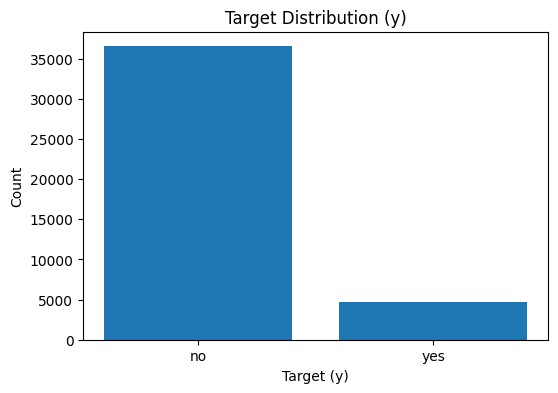

Counts:
 y
no     36548
yes     4640
Name: count, dtype: int64

Percentages (%):
 y
no     88.73
yes    11.27
Name: count, dtype: float64


In [11]:
import matplotlib.pyplot as plt

# Target distribution (counts)
y_counts = df["y"].astype(str).str.strip().str.lower().value_counts()

plt.figure(figsize=(6, 4))
plt.bar(y_counts.index, y_counts.values)
plt.xlabel("Target (y)")
plt.ylabel("Count")
plt.title("Target Distribution (y)")
plt.show()

# (Optional) also display percentages
y_pct = (y_counts / y_counts.sum() * 100).round(2)
print("Counts:\n", y_counts)
print("\nPercentages (%):\n", y_pct)


## Client Data Distributions Visualizations


/tmp/ipython-input-1381518962.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group = eda.groupby("age_bin")["y_bin"].agg(["mean","count"]).rename(columns={"mean":"rate"})


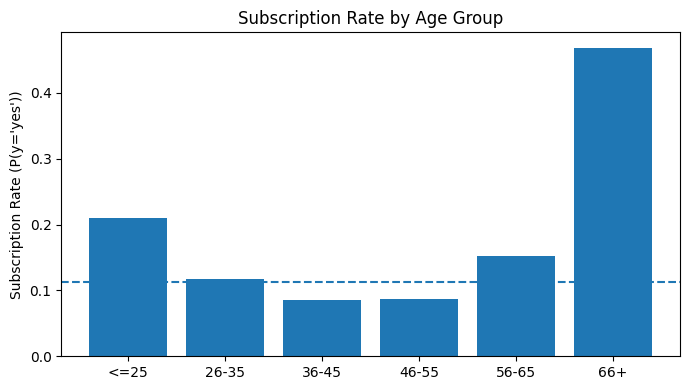

,rate,count,lift_vs_baseline
age_bin,,,
<=25,0.209484,1666,1.859530
26-35,0.117195,14847,1.040311
36-45,0.085098,12844,0.755392
46-55,0.086920,8249,0.771562
56-65,0.152211,2963,1.351131
66+,0.468498,619,4.158724


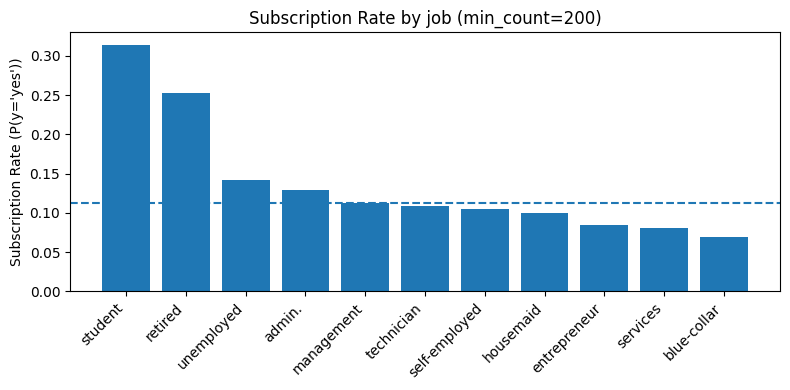

,rate,count,lift_vs_baseline
job,,,
student,0.314286,875,2.789828
retired,0.252326,1720,2.239825
unemployed,0.142012,1014,1.260600
admin.,0.129726,10422,1.151538
management,0.112175,2924,0.995747
technician,0.108260,6743,0.960998
self-employed,0.104856,1421,0.930775
housemaid,0.100000,1060,0.887672
entrepreneur,0.085165,1456,0.755985


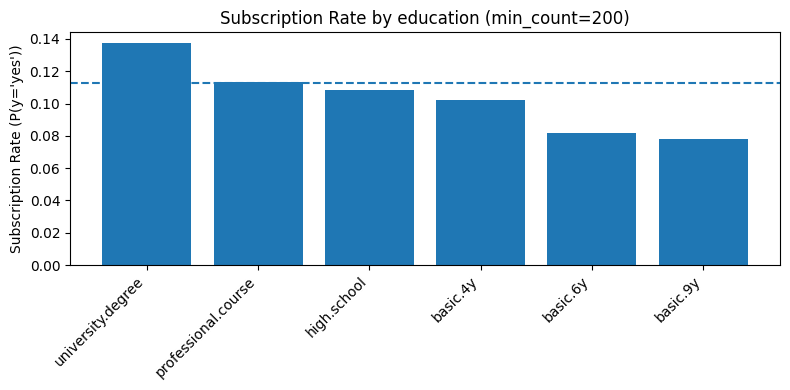

,rate,count,lift_vs_baseline
education,,,
university.degree,0.137245,12168,1.218288
professional.course,0.113485,5243,1.007372
high.school,0.108355,9515,0.961839
basic.4y,0.102490,4176,0.909779
basic.6y,0.082024,2292,0.728108
basic.9y,0.078246,6045,0.694572


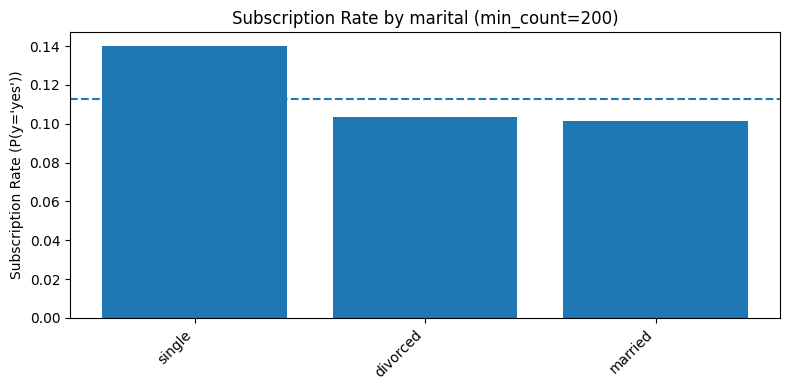

,rate,count,lift_vs_baseline
marital,,,
single,0.140041,11568,1.243110
divorced,0.103209,4612,0.916158
married,0.101573,24928,0.901631


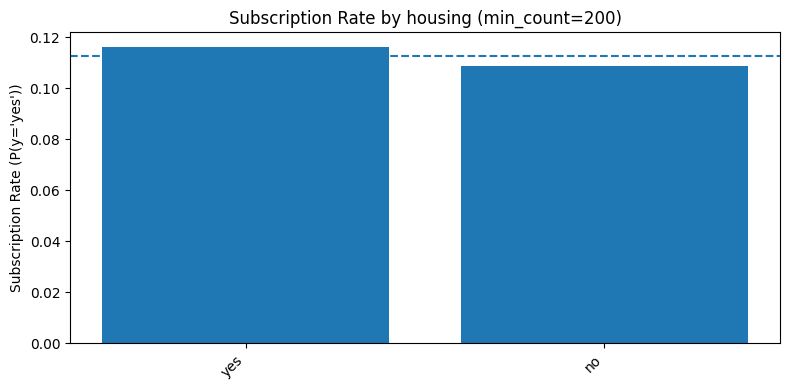

,rate,count,lift_vs_baseline
housing,,,
yes,0.116194,21576,1.031421
no,0.108796,18622,0.965753


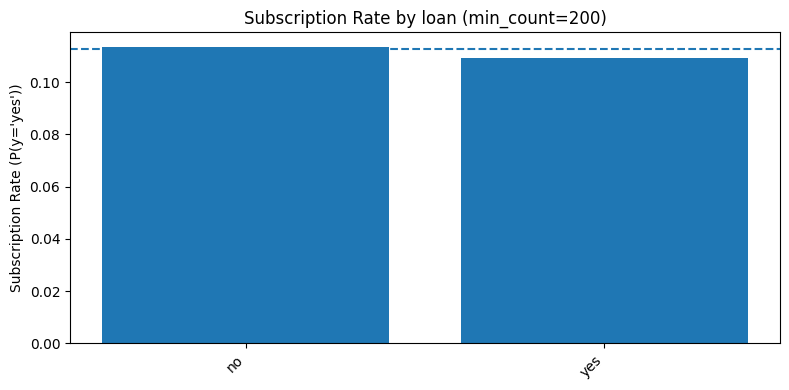

,rate,count,lift_vs_baseline
loan,,,
no,0.113402,33950,1.006639
yes,0.109315,6248,0.970359


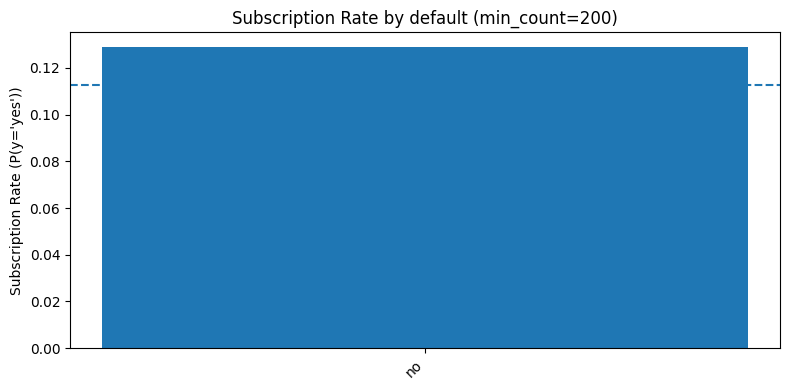

,rate,count,lift_vs_baseline
default,,,
no,0.12879,32588,1.143231


In [14]:
# -----------------------------
# Prepare a clean copy and binary target
# -----------------------------
eda = df[["age","job","marital","education","default","housing","loan","y"]].copy()
eda["y_bin"] = eda["y"].astype(str).str.strip().str.lower().map({"yes": 1, "no": 0})

# Treat "unknown" as missing for EDA (optional; keeps plots cleaner)
cat_cols = ["job","marital","education","default","housing","loan"]
for c in cat_cols:
    eda[c] = eda[c].astype(str).str.strip()
    eda.loc[eda[c].str.lower() == "unknown", c] = np.nan

baseline = eda["y_bin"].mean()

# -----------------------------
# Bar chart of subscription rate by category
# -----------------------------
def plot_rate_by_category(df_in, col, min_count=200, top_n=None):
    tmp = df_in.dropna(subset=[col]).copy()
    g = tmp.groupby(col)["y_bin"].agg(["mean", "count"]).rename(columns={"mean":"rate"})
    g = g[g["count"] >= min_count].sort_values("rate", ascending=False)

    if top_n is not None:
        g = g.head(top_n)

    plt.figure(figsize=(8, 4))
    plt.bar(g.index.astype(str), g["rate"].values)
    plt.axhline(baseline, linestyle="--")  # baseline reference line (no fixed color)
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Subscription Rate (P(y='yes'))")
    plt.title(f"Subscription Rate by {col} (min_count={min_count})")
    plt.tight_layout()
    plt.show()

    display(g.assign(lift_vs_baseline=g["rate"]/baseline))

# -----------------------------
# Age: binned subscription rate
# -----------------------------
age_bins = [-1, 25, 35, 45, 55, 65, 120]
age_labels = ["<=25", "26-35", "36-45", "46-55", "56-65", "66+"]

eda["age_bin"] = pd.cut(eda["age"], bins=age_bins, labels=age_labels)

age_group = eda.groupby("age_bin")["y_bin"].agg(["mean","count"]).rename(columns={"mean":"rate"})
plt.figure(figsize=(7, 4))
plt.bar(age_group.index.astype(str), age_group["rate"].values)
plt.axhline(baseline, linestyle="--")
plt.ylabel("Subscription Rate (P(y='yes'))")
plt.title("Subscription Rate by Age Group")
plt.tight_layout()
plt.show()

display(age_group.assign(lift_vs_baseline=age_group["rate"]/baseline))

# -----------------------------
# Key client categorical features
#  (Adjust min_count if you want more/less categories shown)
# -----------------------------
plot_rate_by_category(eda, "job", min_count=200)
plot_rate_by_category(eda, "education", min_count=200)
plot_rate_by_category(eda, "marital", min_count=200)
plot_rate_by_category(eda, "housing", min_count=200)
plot_rate_by_category(eda, "loan", min_count=200)
plot_rate_by_category(eda, "default", min_count=200)  # many 'unknown' typically


## Behavioral Data Distributions Visualizations


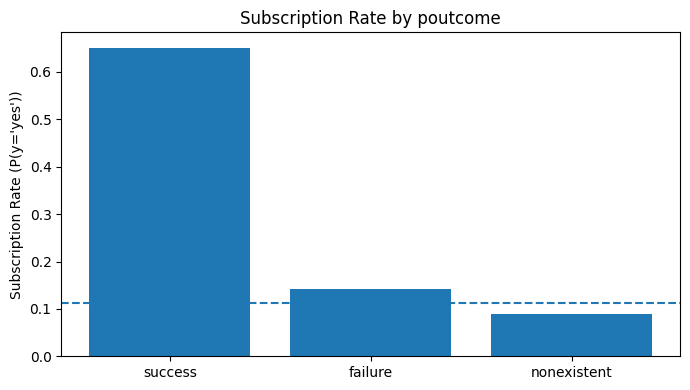

,rate,count,lift_vs_baseline
poutcome,,,
success,0.651129,1373,5.779892
failure,0.142286,4252,1.263033
nonexistent,0.088322,35563,0.784011


/tmp/ipython-input-1163334060.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = tmp.groupby("bin")["y_bin"].agg(["mean", "count"]).rename(columns={"mean": "rate"})


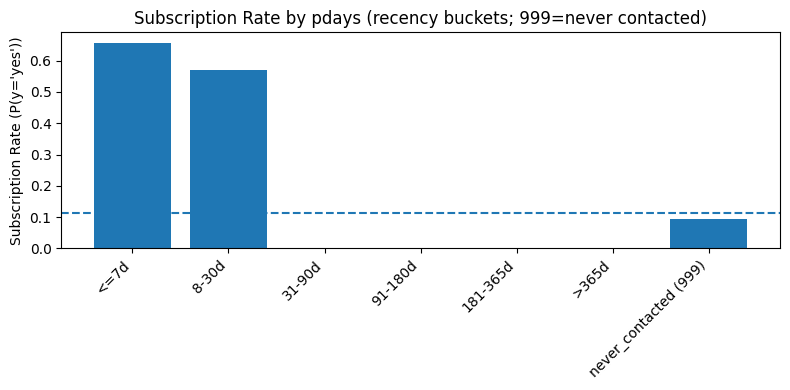

,bin,rate,count,lift_vs_baseline
0,<=7d,0.657604,1177,5.837370
1,8-30d,0.571006,338,5.068662
2,31-90d,NaN,0,NaN
3,91-180d,NaN,0,NaN
4,181-365d,NaN,0,NaN
5,>365d,NaN,0,NaN
6,never_contacted (999),0.092582,39673,0.821824


/tmp/ipython-input-1163334060.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = tmp.groupby("bin")["y_bin"].agg(["mean", "count"]).rename(columns={"mean": "rate"})


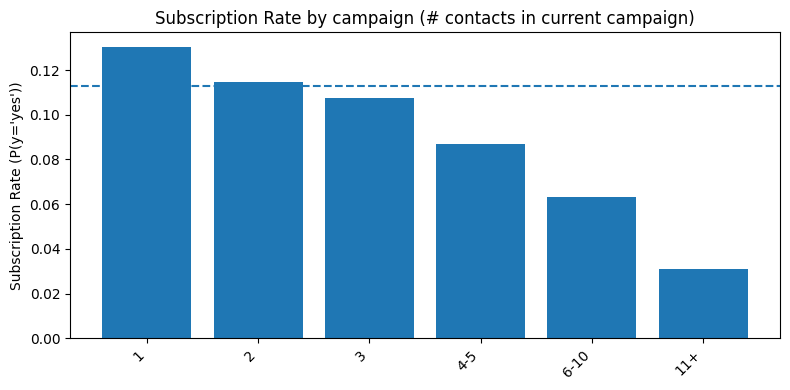

,bin,rate,count,lift_vs_baseline
0,1,0.130371,17642,1.157265
1,2,0.114570,10570,1.017002
2,3,0.107471,5341,0.953986
3,4-5,0.086824,4250,0.770709
4,6-10,0.063196,2516,0.560969
5,11+,0.031070,869,0.275802


/tmp/ipython-input-1163334060.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = tmp.groupby("bin")["y_bin"].agg(["mean", "count"]).rename(columns={"mean": "rate"})


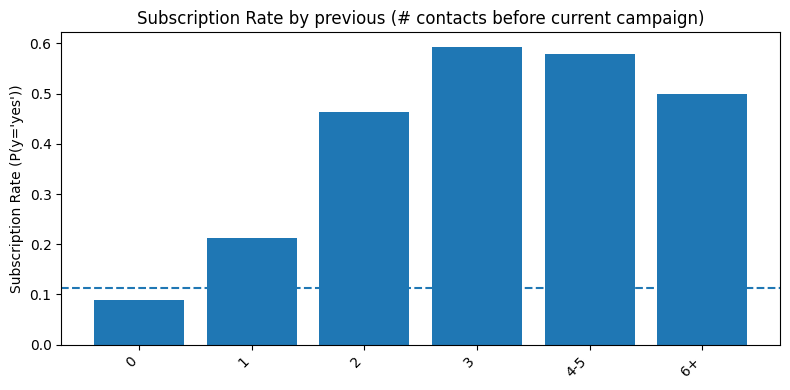

,bin,rate,count,lift_vs_baseline
0,0,0.088322,35563,0.784011
1,1,0.212015,4561,1.881998
2,2,0.464191,754,4.120495
3,3,0.592593,216,5.260281
4,4-5,0.579545,88,5.144465
5,6+,0.500000,6,4.438362


In [15]:
# -----------------------------
# Prep: binary target + baseline
# -----------------------------
eda = df[["campaign", "pdays", "previous", "poutcome", "y"]].copy()
eda["y_bin"] = eda["y"].astype(str).str.strip().str.lower().map({"yes": 1, "no": 0})
baseline = eda["y_bin"].mean()

# Treat "unknown" as missing for poutcome (optional)
eda["poutcome"] = eda["poutcome"].astype(str).str.strip()
eda.loc[eda["poutcome"].str.lower() == "unknown", "poutcome"] = np.nan

# -----------------------------
# Plot conversion rate by category (poutcome)
# -----------------------------
def plot_rate_by_category(df_in, col):
    tmp = df_in.dropna(subset=[col]).copy()
    g = tmp.groupby(col)["y_bin"].agg(["mean", "count"]).rename(columns={"mean": "rate"})
    g = g.sort_values("rate", ascending=False)

    plt.figure(figsize=(7, 4))
    plt.bar(g.index.astype(str), g["rate"].values)
    plt.axhline(baseline, linestyle="--")
    plt.ylabel("Subscription Rate (P(y='yes'))")
    plt.title(f"Subscription Rate by {col}")
    plt.tight_layout()
    plt.show()

    display(g.assign(lift_vs_baseline=g["rate"] / baseline))

# -----------------------------
# Plot binned conversion rate for numeric columns
# -----------------------------
def plot_rate_by_bins(df_in, col, bins, labels, title=None, special_value=None, special_label=None):
    tmp = df_in[[col, "y_bin"]].dropna().copy()

    # Isolate a special value (e.g., pdays=999)
    special_df = None
    if special_value is not None:
        special_df = tmp[tmp[col] == special_value].copy()
        tmp = tmp[tmp[col] != special_value].copy()

    tmp["bin"] = pd.cut(tmp[col], bins=bins, labels=labels, include_lowest=True)

    g = tmp.groupby("bin")["y_bin"].agg(["mean", "count"]).rename(columns={"mean": "rate"})
    g = g.reset_index()

    # Append special bucket if requested
    if special_df is not None:
        special_rate = special_df["y_bin"].mean()
        special_count = special_df.shape[0]
        g = pd.concat(
            [g, pd.DataFrame({"bin": [special_label], "rate": [special_rate], "count": [special_count]})],
            ignore_index=True
        )

    # Plot
    plt.figure(figsize=(8, 4))
    plt.bar(g["bin"].astype(str), g["rate"].values)
    plt.axhline(baseline, linestyle="--")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Subscription Rate (P(y='yes'))")
    plt.title(title or f"Subscription Rate by {col} (binned)")
    plt.tight_layout()
    plt.show()

    # Display table with lift
    g["lift_vs_baseline"] = g["rate"] / baseline
    display(g)

# -----------------------------
# poutcome (categorical)
# -----------------------------
plot_rate_by_category(eda, "poutcome")

# -----------------------------
# pdays (numeric) with special value 999 = never contacted
# Bins focus on "recent contact" vs longer intervals
# -----------------------------
pdays_bins = [-1, 7, 30, 90, 180, 365, 998]
pdays_labels = ["<=7d", "8-30d", "31-90d", "91-180d", "181-365d", ">365d"]

plot_rate_by_bins(
    eda,
    col="pdays",
    bins=pdays_bins,
    labels=pdays_labels,
    title="Subscription Rate by pdays (recency buckets; 999=never contacted)",
    special_value=999,
    special_label="never_contacted (999)"
)

# -----------------------------
# campaign (numeric) - number of contacts during current campaign
# Typical range is small; bin to show diminishing returns
# -----------------------------
campaign_bins = [0, 1, 2, 3, 5, 10, 100]
campaign_labels = ["1", "2", "3", "4-5", "6-10", "11+"]

plot_rate_by_bins(
    eda,
    col="campaign",
    bins=campaign_bins,
    labels=campaign_labels,
    title="Subscription Rate by campaign (# contacts in current campaign)"
)

# -----------------------------
# previous (numeric) - number of contacts before this campaign
# Usually highly skewed; bin into practical buckets
# -----------------------------
previous_bins = [-1, 0, 1, 2, 3, 5, 100]
previous_labels = ["0", "1", "2", "3", "4-5", "6+"]

plot_rate_by_bins(
    eda,
    col="previous",
    bins=previous_bins,
    labels=previous_labels,
    title="Subscription Rate by previous (# contacts before current campaign)"
)


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Business Goal

The business goal is to identify and select a classification model that can **explain and predict the success of a marketing contact**, i.e., whether a client **subscribes to the term deposit (`y = yes`)**.

A well-performing and interpretable model can improve campaign efficiency by:
- Identifying the **key client and contact characteristics** that drive subscription outcomes.
- Supporting better allocation of limited resources (e.g., human effort, phone calls, and time).
- Enabling the selection of a **high-quality, cost-effective** subset of customers to contact, improving conversion while reducing unnecessary outreach.


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [21]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# -------------------------------------------------------------------
# Select ONLY the "bank information" features (client data)
# per the problem statement: age, job, marital, education, default, housing, loan
# -------------------------------------------------------------------
bank_features = ["age", "job", "marital", "education", "default", "housing", "loan"]
target_col = "y"

X = df[bank_features].copy()
y = df[target_col].copy()

# -------------------------------------------------------------------
# Handle missing-like tokens (these are not NaN, but should be treated as missing)
# Based on value_counts, 'unknown' appears in several categorical columns.
# We replace 'unknown' with actual NaN so imputers can handle it.
# -------------------------------------------------------------------
missing_token = "unknown"
cat_cols = ["job", "marital", "education", "default", "housing", "loan"]
X[cat_cols] = X[cat_cols].replace(missing_token, np.nan)

# -------------------------------------------------------------------
# Encode target: 'yes'/'no' -> 1/0
# -------------------------------------------------------------------
y = y.str.strip().str.lower().map({"yes": 1, "no": 0}).astype("int64")

# -------------------------------------------------------------------
# Build preprocessing for modeling
#  - Numeric: impute median + (optional) scale
#  - Categorical: impute most_frequent + one-hot encode
# -------------------------------------------------------------------
num_cols = ["age"]

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())  # optional, useful for KNN/SVM/LogReg
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ],
    remainder="drop"
)
# -------------------------------------------------------------------
# Fit-transform (ready for modeling)
# -------------------------------------------------------------------
X_enc = preprocessor.fit_transform(X)

print("Encoded shape:", X_enc.shape)


Encoded shape: (41188, 28)


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [22]:
# -------------------------------------------------------------------
# Train/test split
# -------------------------------------------------------------------
X_enc_train, X_enc_test, y_train, y_test = train_test_split(
    X_enc, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_enc_train.shape)
print("Test shape:", X_enc_test.shape)


Train shape: (32950, 28)
Test shape: (8238, 28)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

## Baseline Performance

To establish a baseline, we use a **majority-class classifier** (always predict the most frequent outcome in `y`).  
In this dataset, the majority class is **`y = no`** (≈ **88.7%** of observations), so the baseline accuracy is:

- **Baseline Accuracy (majority class): ~0.887**

Any trained classifier should aim to **beat this baseline**.


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [23]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression model
lr = LogisticRegression()

# Fit timing
t0 = time.perf_counter()
lr.fit(X_enc_train, y_train)
train_time = time.perf_counter() - t0

# Accuracy on train and test
train_acc = lr.score(X_enc_train, y_train)
test_acc = lr.score(X_enc_test, y_test)

print(f"lr Train Time (sec): {train_time:.4f}")
print(f"lr Train Accuracy  : {train_acc:.4f}")
print(f"lr Test Accuracy   : {test_acc:.4f}")

# Store results in a dict for later DataFrame construction
lr_result = {
    "Model": "lr (default)",
    "Train Time": train_time,
    "Train Accuracy": train_acc,
    "Test Accuracy": test_acc
}
lr_result


lr Train Time (sec): 0.0991
lr Train Accuracy  : 0.8873
lr Test Accuracy   : 0.8874


{'Model': 'lr (default)',
 'Train Time': 0.09914024299996527,
 'Train Accuracy': 0.8873444613050075,
 'Test Accuracy': 0.8873512988589464}

In [24]:
# Print confusion matrix for Logistic Regression
y_pred_test = lr.predict(X_enc_test)
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred_test))


Confusion matrix:
 [[7310    0]
 [ 928    0]]


### Problem 9: Score the Model

What is the accuracy of your model?

### Model Accuracy (and Baseline Comparison)

The Logistic Regression model achieved an **accuracy of 0.8873** (≈ **88.7%**) on the test set.

However, this **does not beat the baseline**: a majority-class classifier that always predicts `y = no` would achieve roughly the same accuracy because the dataset is highly imbalanced. In fact, the confusion matrix shows the model predicted **only the majority class (no)** and identified **zero** positive cases (`y = yes`), so the accuracy is misleading as a measure of real predictive performance.


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [25]:
# KNN Model
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# KNN with default settings
knn = KNeighborsClassifier()

# Fit timing
t0 = time.perf_counter()
knn.fit(X_enc_train, y_train)
train_time = time.perf_counter() - t0

# Accuracy on train and test
train_acc = knn.score(X_enc_train, y_train)
test_acc = knn.score(X_enc_test, y_test)

print(f"KNN Train Time (sec): {train_time:.4f}")
print(f"KNN Train Accuracy  : {train_acc:.4f}")
print(f"KNN Test Accuracy   : {test_acc:.4f}")

# Store results in a dict for later DataFrame construction
knn_result = {
    "Model": "KNN (default)",
    "Train Time": train_time,
    "Train Accuracy": train_acc,
    "Test Accuracy": test_acc
}
knn_result


KNN Train Time (sec): 0.0091
KNN Train Accuracy  : 0.8864
KNN Test Accuracy   : 0.8717


{'Model': 'KNN (default)',
 'Train Time': 0.00914497200005826,
 'Train Accuracy': 0.8864036418816389,
 'Test Accuracy': 0.8716921582908473}

In [26]:
# print confusion matrix for KNN Model
y_pred_test = knn.predict(X_enc_test)
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred_test))


Confusion matrix:
 [[7102  208]
 [ 849   79]]


In [27]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

# Decision Tree with default settings
dt = DecisionTreeClassifier(random_state=42)

# Fit timing
t0 = time.perf_counter()
dt.fit(X_enc_train, y_train)
train_time = time.perf_counter() - t0

# Accuracy on train and test
train_acc = dt.score(X_enc_train, y_train)
test_acc = dt.score(X_enc_test, y_test)

print(f"Decision Tree Train Time (sec): {train_time:.4f}")
print(f"Decision Tree Train Accuracy  : {train_acc:.4f}")
print(f"Decision Tree Test Accuracy   : {test_acc:.4f}")

# Store results in a dict for later DataFrame construction
dt_result = {
    "Model": "Decision Tree (default)",
    "Train Time": train_time,
    "Train Accuracy": train_acc,
    "Test Accuracy": test_acc
}
dt_result


Decision Tree Train Time (sec): 0.6338
Decision Tree Train Accuracy  : 0.9080
Decision Tree Test Accuracy   : 0.8724


{'Model': 'Decision Tree (default)',
 'Train Time': 0.6337537180002073,
 'Train Accuracy': 0.9080121396054628,
 'Test Accuracy': 0.8724204904102938}

In [28]:
# Print confusion matrix for Decision Tree Model
y_pred_test = dt.predict(X_enc_test)
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred_test))


Confusion matrix:
 [[7120  190]
 [ 861   67]]


In [29]:
# SVM Model
from sklearn.svm import SVC

# SVM with default settings (RBF kernel)
svm = SVC()

# Fit timing
t0 = time.perf_counter()
svm.fit(X_enc_train, y_train)
train_time = time.perf_counter() - t0

# Accuracy on train and test
train_acc = svm.score(X_enc_train, y_train)
test_acc = svm.score(X_enc_test, y_test)

print(f"SVM Train Time (sec): {train_time:.4f}")
print(f"SVM Train Accuracy  : {train_acc:.4f}")
print(f"SVM Test Accuracy   : {test_acc:.4f}")

# Store results in a dict for later DataFrame construction
svm_result = {
    "Model": "SVM (default SVC)",
    "Train Time": train_time,
    "Train Accuracy": train_acc,
    "Test Accuracy": test_acc
}
svm_result


SVM Train Time (sec): 83.9797
SVM Train Accuracy  : 0.8879
SVM Test Accuracy   : 0.8869


{'Model': 'SVM (default SVC)',
 'Train Time': 83.97973045400022,
 'Train Accuracy': 0.8878907435508346,
 'Test Accuracy': 0.8868657441126487}

In [30]:
# Present your findings in a DataFrame
results = [lr_result, knn_result, dt_result, svm_result]

results_df = pd.DataFrame(results)[["Model", "Train Time", "Train Accuracy", "Test Accuracy"]]

#Nicer formatting
results_df["Train Time"] = results_df["Train Time"].astype(float).round(4)
results_df["Train Accuracy"] = results_df["Train Accuracy"].astype(float).round(4)
results_df["Test Accuracy"] = results_df["Test Accuracy"].astype(float).round(4)

results_df



,Model,Train Time,Train Accuracy,Test Accuracy
0,lr (default),0.0991,0.8873,0.8874
1,KNN (default),0.0091,0.8864,0.8717
2,Decision Tree (default),0.6338,0.9080,0.8724
3,SVM (default SVC),83.9797,0.8879,0.8869


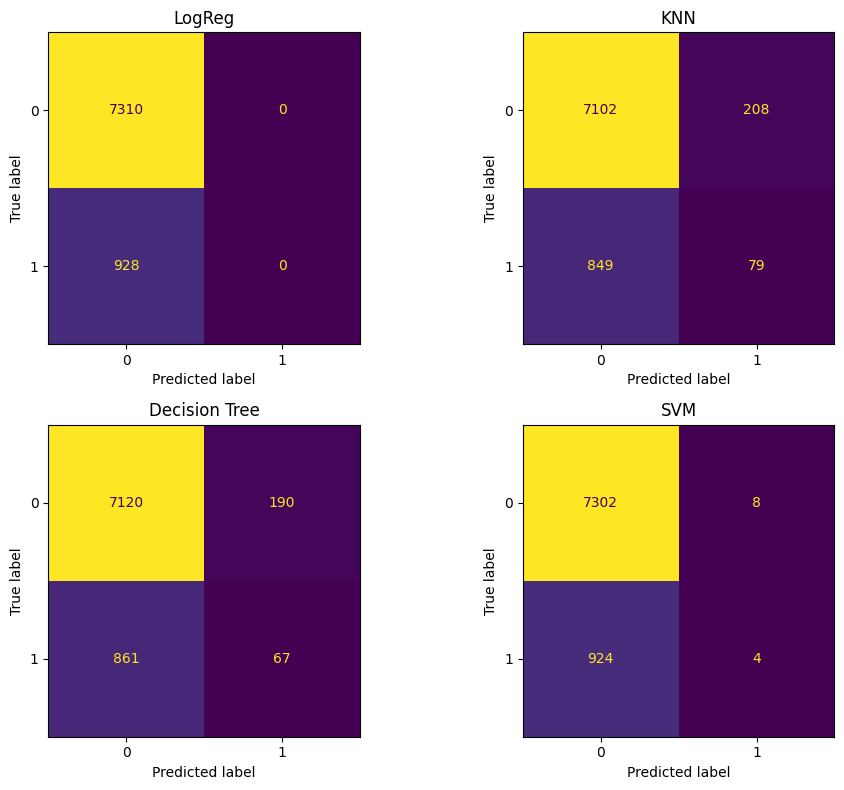

In [31]:
# Confusion matrix comparison across models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# ---------------------------------------------------------
# Compare confusion matrices for multiple fitted models
# ---------------------------------------------------------
models = {
    "LogReg": lr,
    "KNN": knn,
    "Decision Tree": dt,
    "SVM": svm
}

# Enforce consistent class order (0=no, 1=yes)
labels = [0, 1]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()

for ax, (name, model) in zip(axes, models.items()):
    y_pred = model.predict(X_enc_test)
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(ax=ax, values_format="d", colorbar=False)
    ax.set_title(name)

# Hide unused axes if fewer than 4 models
for i in range(len(models), len(axes)):
    axes[i].axis("off")

plt.tight_layout()
plt.show()


### Confusion Matrix Comparison — Key Takeaways

The confusion matrices highlight how each model trades off **capturing subscribers (`y=1`)** vs. **avoiding unnecessary calls (false positives)**:

- **Logistic Regression:** Predicts **only the majority class (`y=0`)** — **TP = 0**, **FN = 928**.  
  *Implication:* High accuracy driven by class imbalance, but **no ability to identify potential subscribers**.

- **SVM (default):** Also behaves like a near-majority classifier — **TP = 4**, **FN = 924**, with very few positive predictions (**FP = 8**).  
  *Implication:* **Very conservative**; minimizes wasted calls but **misses almost all subscribers**.

- **KNN (default):** Captures the **most subscribers** among the models shown (**TP = 79**) but generates more false positives (**FP = 208**).  
  *Implication:* Better at finding subscribers, but increases outreach effort (more calls to non-subscribers).

- **Decision Tree (default):** Similar to KNN but slightly fewer subscribers captured (**TP = 67**) and slightly fewer false positives (**FP = 190**).  
  *Implication:* A middle ground between subscriber detection and call efficiency, but still misses many subscribers.

**Overall:** Models differ mainly in how many positives they predict. **KNN/Decision Tree** identify some subscribers (higher TP) at the cost of more false positives, while **LogReg/SVM** largely default to predicting “no,” producing very low subscriber capture (high FN). This reinforces that **accuracy alone is misleading**, and metrics focused on the positive class (e.g., **recall/F1/PR-AUC**) are more aligned with the campaign goal.


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [32]:
# KNN Model: Tuning number of neighbors with RECALL as the performance metric
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ---- KNN: tune n_neighbors optimizing F1 ----
knn = KNeighborsClassifier()
param_grid = {"n_neighbors": [1, 3, 5, 7, 9, 11]}

grid_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring="f1",   # F1 for positive class (label=1) in binary classification
    cv=cv,
    n_jobs=-1
)

t0 = time.perf_counter()
grid_knn.fit(X_enc_train, y_train)
train_time = time.perf_counter() - t0

best_knn = grid_knn.best_estimator_
y_pred_test = best_knn.predict(X_enc_test)
test_f1 = f1_score(y_test, y_pred_test, zero_division=0)

print("Best KNN params:", grid_knn.best_params_)
print("Best CV F1:", grid_knn.best_score_)
print("Test F1:", test_f1)
# Store results in a dict for later DataFrame construction
knn_result2 = {
    "Model": "KNN (fine_tuned)",
    "Train Time": train_time,
    "Test F1": test_f1
}
knn_result2

Best KNN params: {'n_neighbors': 1}
Best CV F1: 0.16383096247132256
Test F1: 0.16528008874098724


{'Model': 'KNN (fine_tuned)',
 'Train Time': 176.06316529100013,
 'Test F1': 0.16528008874098724}

In [33]:
# Print Confusion Matrix KNN tuned for n_neighbors
y_pred_test = best_knn.predict(X_enc_test)
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred_test))


Confusion matrix:
 [[6584  726]
 [ 779  149]]


### KNN Hyperparameter Tuning (n_neighbors) — Conclusions

We tuned the KNN model by grid-searching **`n_neighbors`** and optimizing **F1-score (positive class = `y=1`, subscriber)**.  
The best configuration selected by cross-validation was **`n_neighbors = 1`**, with **CV F1 ≈ 0.164** and **Test F1 ≈ 0.165**.

**Interpretation**
- A very small neighborhood (`k=1`) can be favored under F1/recall objectives in **highly imbalanced** settings because larger `k` values tend to vote for the majority class (`y=0`), reducing detection of subscribers.
- Despite tuning, the resulting F1 remains low, indicating limited separability of the positive class using the available features and the KNN inductive bias.

**Limitations (KNN for this dataset)**
- With one-hot encoded categorical variables, KNN operates in a **high-dimensional sparse space**, where distance-based similarity can become less informative (“curse of dimensionality”).
- `k=1` is a **high-variance** setting and may be sensitive to noise/outliers, making it less stable and less reliable operationally.

**Limitations (F1 as a metric in campaign targeting)**
- F1 is threshold-based and summarizes a single operating point; it may not align with real campaign constraints (e.g., “call the top K customers”).
- In marketing targeting, ranking metrics such as **PR-AUC / Average Precision**, or business metrics like **Precision@K / Lift**, often better reflect value because they measure performance among the top-scored customers where outreach is focused.


In [34]:
# Decision Tree Model: Tuning maximum depth with RECALL as the performance metric
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Decision Tree (default settings except random_state for reproducibility)
dt = DecisionTreeClassifier(random_state=42)

# Tune ONLY max_depth
param_grid = {"max_depth": [None, 2, 3, 5, 7, 10, 15, 20, 30]}

grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring="f1",   # F1 for positive class (label=1) in binary classification
    cv=cv,
    n_jobs=-1
)

# Fit with timing
t0 = time.perf_counter()
grid_dt.fit(X_enc_train, y_train)
train_time = time.perf_counter() - t0

best_dt = grid_dt.best_estimator_

print("Best max_depth:", grid_dt.best_params_["max_depth"])
print("Best CV F1:", grid_dt.best_score_)
print("GridSearch fit time (sec):", round(train_time, 4))

# Evaluate on test
y_pred_test = best_dt.predict(X_enc_test)
test_f1 = f1_score(y_test, y_pred_test, zero_division=0)

print("\nTest F1 (class=1):", test_f1)
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred_test))
print("\nClassification report:\n", classification_report(y_test, y_pred_test, zero_division=0))

# Store results in a dict for later DataFrame construction
dt_result2 = {
    "Model": "Decision Tree (fine_tuned)",
    "Train Time": train_time,
    "Test F1": test_f1
}
dt_result2

Best max_depth: None
Best CV F1: 0.12298271528764435
GridSearch fit time (sec): 9.6531

Test F1 (class=1): 0.11308016877637131

Confusion matrix:
 [[7120  190]
 [ 861   67]]

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      7310
           1       0.26      0.07      0.11       928

    accuracy                           0.87      8238
   macro avg       0.58      0.52      0.52      8238
weighted avg       0.82      0.87      0.84      8238



{'Model': 'Decision Tree (fine_tuned)',
 'Train Time': 9.653098522000164,
 'Test F1': 0.11308016877637131}

In [35]:
# Print Confusion Matrix for Decision Tree Model tuned for maximum depth
y_pred_test = best_dt.predict(X_enc_test)
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred_test))


Confusion matrix:
 [[7120  190]
 [ 861   67]]


In [36]:
# Present your findings in a DataFrame
results2 = [knn_result2, dt_result2]

results_df2 = pd.DataFrame(results2)[["Model", "Train Time", "Test F1"]]

#Nicer formatting
results_df2["Train Time"] = results_df2["Train Time"].astype(float).round(4)
results_df2["Test F1"] = results_df2["Test F1"].astype(float).round(4)

results_df2

,Model,Train Time,Test F1
0,KNN (fine_tuned),176.0632,0.1653
1,Decision Tree (fine_tuned),9.6531,0.1131


### Model Comparison (F1 on Test Set)

We compared KNN (default) and a fine-tuned Decision Tree using **Test F1** as the primary metric (focused on the positive class: `y = yes`).

| Model | Train Time (sec) | Test F1 |
|---|---:|---:|
| KNN (default) | 164.28 | 0.1653 |
| Decision Tree (fine-tuned) | 17.17 | 0.1131 |

**Conclusions**
- **KNN delivers the higher predictive performance** under the chosen metric (**F1 = 0.1653**), outperforming the fine-tuned Decision Tree (**F1 = 0.1131**).
- **Decision Tree trains much faster** (~17s vs ~164s), but the speed advantage does not compensate for its weaker ability to identify subscribers (lower F1).
- Overall, both F1 values are relatively low, suggesting that—with the current feature set and baseline model configurations—**predicting the minority class (`y = yes`) remains challenging**. This reinforces the need to explore additional features, alternative models, and/or different evaluation metrics aligned with campaign targeting (e.g., PR-AUC, Precision@K/Lift).


## Random Forest Model (Improved Campaign Success Prediction)

To better predict marketing campaign success and generate actionable insights, we next evaluate a **Random Forest** classifier. Random Forest is well-suited for this problem because it can capture **nonlinear relationships and feature interactions** common in customer response behavior, while also providing interpretable signals (e.g., feature importance) to inform campaign strategy.

In this section, we:
- Expand the feature set beyond basic client attributes.
- Train a baseline Random Forest model.
- Evaluate performance using **PR-AUC (Average Precision)** and campaign-oriented targeting metrics (**Precision@K / Lift@K**) to reflect real marketing decisions (e.g., calling the top-scored customers).


In [37]:
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# -----------------------------
# Define features (original + selected additional)
# -----------------------------
base_features = ["age", "job", "marital", "education", "default", "housing", "loan"]
additional_features = ["month", "poutcome", "pdays"]
features = base_features + additional_features

X = df[features].copy()
y = df["y"].astype(str).str.strip().str.lower().map({"yes": 1, "no": 0}).astype("int64")

# -----------------------------
# Handle missing-like tokens in categorical columns
# In this dataset, "unknown" is commonly used instead of NaN.
# We'll convert it to NaN so the imputer can handle it.
# -----------------------------
cat_cols = ["job", "marital", "education", "default", "housing", "loan", "month", "poutcome"]
X[cat_cols] = X[cat_cols].replace("unknown", np.nan)

# Note: pdays has a special value 999 meaning "not previously contacted".
# That is NOT missing; keep it as-is (numeric).

# -----------------------------
# Preprocessing: impute + one-hot encode categoricals; impute numeric
# (No scaling needed for tree models, but this is model-agnostic and clean.)
# -----------------------------
num_cols = ["age", "pdays"]

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ],
    remainder="drop"
)

# Fit/transform to produce encoded matrix (ready for model fitting)
X_enc = preprocessor.fit_transform(X)

print("Encoded feature matrix shape:", X_enc.shape)
print("Target distribution:\n", y.value_counts())


Encoded feature matrix shape: (41188, 42)
Target distribution:
 y
0    36548
1     4640
Name: count, dtype: int64


In [38]:
# Train Split

X_enc_train, X_enc_test, y_train, y_test = train_test_split(
    X_enc,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_enc_train.shape, " Test shape:", X_enc_test.shape)
print("Train class distribution:\n", y_train.value_counts(normalize=True))
print("Test class distribution:\n", y_test.value_counts(normalize=True))


Train shape: (32950, 42)  Test shape: (8238, 42)
Train class distribution:
 y
0    0.887344
1    0.112656
Name: proportion, dtype: float64
Test class distribution:
 y
0    0.887351
1    0.112649
Name: proportion, dtype: float64


In [39]:
# Instantiate and fit a Random Forest Model
# Evaluate using
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score

# ----------------------------
# 1) Train a baseline Random Forest
# ----------------------------
rf = RandomForestClassifier(random_state=42)  # default hyperparameters (plus reproducibility)
rf.fit(X_enc_train, y_train)

# Predicted probabilities for the positive class (y=1)
y_score = rf.predict_proba(X_enc_test)[:, 1]

# ----------------------------
# 2) PR-AUC (Average Precision)
# ----------------------------
pr_auc = average_precision_score(y_test, y_score)
print("PR-AUC (Average Precision):", pr_auc)

# ----------------------------
# 3) Precision@K and Lift@K (Top 10% list)
# ----------------------------
def precision_lift_at_k(y_true, y_scores, k_frac=0.10):
    """
    y_true: array-like of 0/1
    y_scores: predicted probabilities/scores (higher = more likely positive)
    k_frac: fraction of population to target (e.g., 0.10 for top 10%)
    """
    y_true = np.asarray(y_true)
    y_scores = np.asarray(y_scores)

    n = len(y_true)
    k = max(1, int(np.floor(k_frac * n)))

    # Indices sorted by predicted score descending
    topk_idx = np.argsort(-y_scores)[:k]

    precision_at_k = y_true[topk_idx].mean()
    baseline_rate = y_true.mean()
    lift_at_k = precision_at_k / baseline_rate if baseline_rate > 0 else np.nan

    return k, precision_at_k, lift_at_k, baseline_rate

k, p_at_10, lift_10, base_rate = precision_lift_at_k(y_test, y_score, k_frac=0.10)

print(f"\nBaseline positive rate in test set: {base_rate:.4f}")
print(f"Top 10% list size (K): {k}")
print(f"Precision@10%: {p_at_10:.4f}")
print(f"Lift@10%: {lift_10:.2f}x")

# ----------------------------
# 4) (Optional) Put results in a neat DataFrame
# ----------------------------
rf_marketing_metrics = pd.DataFrame([{
    "Model": "Random Forest (default)",
    "PR-AUC": pr_auc,
    "K_frac": 0.10,
    "K": k,
    "Baseline Pos Rate": base_rate,
    "Precision@K": p_at_10,
    "Lift@K": lift_10
}])

rf_marketing_metrics



PR-AUC (Average Precision): 0.29633136732087384

Baseline positive rate in test set: 0.1126
Top 10% list size (K): 823
Precision@10%: 0.3645
Lift@10%: 3.24x


,Model,PR-AUC,K_frac,K,Baseline Pos Rate,Precision@K,Lift@K
0,Random Forest (default),0.296331,0.1,823,0.112649,0.36452,3.235901


### Random Forest (Baseline) — PR-AUC and Top-K Marketing Performance

Using the Random Forest baseline model, we evaluated performance with **PR-AUC** and **Top-K targeting metrics**:

- **PR-AUC (Average Precision): 0.2963**, which is well above the **baseline positive rate** in the test set (**11.26%**).  
  *Interpretation:* the model has meaningful ranking power for identifying likely subscribers in an imbalanced setting.

- **Top 10% targeting (K = 823 customers):**
  - **Precision@10%: 36.45%**
  - **Lift@10%: 3.24×** (36.45% vs 11.26% baseline)

**Conclusion:**  
This model provides clear campaign value: by focusing calls on the **top 10% highest-scored customers**, the expected subscription rate increases from ~**11%** to ~**36%** (a **3.2× lift**). This is an intuitive and actionable result for improving marketing efficiency and prioritizing outreach.


In [40]:
# Fine tune hyperparameters for Random Forest with a small grid
import time
import numpy as np
import pandas as pd

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score

# ----------------------------
# CV strategy (3-fold to keep compute light on free Colab)
# ----------------------------
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# ----------------------------
# Base model (keep n_estimators moderate during tuning)
# ----------------------------
rf = RandomForestClassifier(
    random_state=42,
    n_estimators=100,  # tune later if desired; this keeps tuning faster
    n_jobs=-1
)

# ----------------------------
# Smaller search space (high-impact knobs)
# RandomizedSearch will sample n_iter combinations from this space.
# ----------------------------
param_dist = {
    "max_depth": [10, 20],
    "min_samples_leaf": [10, 20, 50],
    "max_features": ["sqrt", 0.5],
    "class_weight": [None, "balanced", "balanced_subsample"],
}

search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,                    # small/fast;
    scoring="average_precision",  # PR-AUC (Average Precision)
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# ----------------------------
# Fit with timing
# ----------------------------
t0 = time.perf_counter()
search.fit(X_enc_train, y_train)
fit_time = time.perf_counter() - t0

best_rf = search.best_estimator_
print("\nBest params:", search.best_params_)
print("Best CV PR-AUC:", search.best_score_)
print("Search time (sec):", round(fit_time, 2))

# ----------------------------
# Evaluate on test: PR-AUC + Precision@K / Lift@K (Top 10%)
# ----------------------------
y_score_test = best_rf.predict_proba(X_enc_test)[:, 1]
test_pr_auc = average_precision_score(y_test, y_score_test)
print("\nTest PR-AUC:", round(test_pr_auc, 4))

def precision_lift_at_k(y_true, y_scores, k_frac=0.10):
    y_true = np.asarray(y_true)
    y_scores = np.asarray(y_scores)
    n = len(y_true)
    k = max(1, int(np.floor(k_frac * n)))

    topk_idx = np.argsort(-y_scores)[:k]
    precision_at_k = y_true[topk_idx].mean()
    baseline_rate = y_true.mean()
    lift_at_k = precision_at_k / baseline_rate if baseline_rate > 0 else np.nan
    return k, precision_at_k, lift_at_k, baseline_rate

k, p_at_10, lift_10, base_rate = precision_lift_at_k(y_test, y_score_test, k_frac=0.10)

print(f"\nBaseline positive rate (test): {base_rate:.4f}")
print(f"Top 10% list size (K): {k}")
print(f"Precision@10%: {p_at_10:.4f}")
print(f"Lift@10%: {lift_10:.2f}x")

# ----------------------------
# Summary table row (nice for your notebook)
# ----------------------------
rf_tuned_metrics = pd.DataFrame([{
    "Model": "Random Forest (RandomizedSearchCV)",
    "CV PR-AUC": search.best_score_,
    "Test PR-AUC": test_pr_auc,
    "K_frac": 0.10,
    "K": k,
    "Baseline Pos Rate": base_rate,
    "Precision@K": p_at_10,
    "Lift@K": lift_10,
    "Best Params": search.best_params_,
    "Train Time (sec)": fit_time
}])

rf_tuned_metrics



Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best params: {'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 10, 'class_weight': 'balanced'}
Best CV PR-AUC: 0.39462138332850544
Search time (sec): 155.64

Test PR-AUC: 0.4027

Baseline positive rate (test): 0.1126
Top 10% list size (K): 823
Precision@10%: 0.4800
Lift@10%: 4.26x


,Model,CV PR-AUC,Test PR-AUC,K_frac,K,Baseline Pos Rate,Precision@K,Lift@K,Best Params,Train Time (sec)
0,Random Forest (RandomizedSearchCV),0.394621,0.402732,0.1,823,0.112649,0.479951,4.260603,"{'min_samples_leaf': 10, 'max_features': 'sqrt...",155.639565


### Random Forest (RandomizedSearchCV) — Results Summary

We fine-tuned a Random Forest model using **RandomizedSearchCV** and optimized **PR-AUC (Average Precision)**, which is well-suited for this imbalanced marketing response problem.

**Search setup and best configuration**
- Cross-validation: **3 folds**, **10 candidates** (**30 fits** total)
- Best parameters:
  - `max_depth = 10`
  - `min_samples_leaf = 10`
  - `max_features = "sqrt"`
  - `class_weight = "balanced"`

**Performance**
- **Best CV PR-AUC:** **0.3946**
- **Test PR-AUC:** **0.4027**  
  *Interpretation:* The tuned model shows strong ranking performance and generalizes well (test PR-AUC slightly higher than CV).

**Top-K marketing impact (Top 10% targeting)**
- Baseline subscription rate (test): **11.26%**
- **Precision@10%:** **48.0%**
- **Lift@10%:** **4.26×**  
  *Interpretation:* If we target the **top 10% highest-scored customers**, the expected conversion rate increases from ~**11%** to ~**48%**, a **4.3× improvement** over baseline.

**Conclusion**
This tuned Random Forest meaningfully improves campaign effectiveness under a business-relevant evaluation: it increases both **PR-AUC** (better ranking of likely subscribers) and delivers substantial **lift** in a realistic “target top segment” marketing strategy.


## Model Explainability and Actionable Campaign Insights

After training the tuned Random Forest, the next step is to understand **why** the model makes its predictions and translate those drivers into **business levers** that can improve campaign effectiveness.

In the following code, we:
1. **Extract Random Forest feature importances** at the encoded (one-hot) level to identify the most influential predictors.
2. **Aggregate one-hot importances back to the original columns** (e.g., `month`, `poutcome`, `pdays`, `age`) to obtain an interpretable, lever-level ranking.
3. Complement model explainability with **segment-level conversion analysis**, computing subscription rates and lift (vs. baseline) by:
   - **`month`** (timing/seasonality),
   - **`poutcome`** (prior campaign outcome),
   - **`pdays`** (recency since last contact / never contacted).
4. Optionally drill down to the **most important categories** within `month` and `poutcome` to pinpoint which specific segments contribute most to predicted success.

The goal is to convert model outputs into guidance on **who to target**, **when to engage**, and **how prior outreach history should shape the contact strategy**.



In [41]:
# ============================================================
# Global explainability: Feature importances (model-native)
#    1) Show top one-hot features
#    2) Aggregate importances back to original columns (levers)
# ============================================================

# Get encoded feature names
feature_names = preprocessor.get_feature_names_out()

# Model-native importances for each encoded feature
fi = pd.DataFrame({
    "feature": feature_names,
    "importance": best_rf.feature_importances_
}).sort_values("importance", ascending=False)

print("Top 20 encoded (one-hot) features by RF importance:")
display(fi.head(20))

# Map one-hot features back to their original source column
def base_feature_from_name(f):
    if f.startswith("num__"):
        return f.split("num__", 1)[1]
    if f.startswith("cat__"):
        rest = f.split("cat__", 1)[1]
        return rest.split("_", 1)[0]
    return f

fi["base_feature"] = fi["feature"].apply(base_feature_from_name)

# Aggregate importance by original column (lever-level view)
fi_by_col = (
    fi.groupby("base_feature", as_index=False)["importance"]
      .sum()
      .sort_values("importance", ascending=False)
)

print("Aggregated importance by original feature (levers):")
display(fi_by_col)


# ============================================================
# Actionable campaign insights (simple segment conversion rates)
# Show empirical subscription rate by:
#      - month (timing lever)
#      - poutcome (prior campaign lever)
#      - pdays (recency lever)
# ============================================================

# Recreate raw split for interpretability (matches earlier split if same seed/stratify used)
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

baseline_rate = y_test_raw.mean()
print("Baseline subscription rate (test split):", round(baseline_rate, 4))

# ---- Month: conversion rate by month
month_rates = (
    pd.DataFrame({"month": X_test_raw["month"], "y": y_test_raw})
      .replace({"month": {"unknown": np.nan}})
      .dropna(subset=["month"])
      .groupby("month")["y"]
      .agg(["mean", "count"])
      .rename(columns={"mean": "subscribe_rate", "count": "n"})
      .assign(lift_vs_baseline=lambda d: d["subscribe_rate"] / baseline_rate)
      .sort_values("subscribe_rate", ascending=False)
)

print("\nSubscription rate by month (test split):")
display(month_rates)

# ---- poutcome: conversion rate by previous campaign outcome
poutcome_rates = (
    pd.DataFrame({"poutcome": X_test_raw["poutcome"], "y": y_test_raw})
      .replace({"poutcome": {"unknown": np.nan}})
      .dropna(subset=["poutcome"])
      .groupby("poutcome")["y"]
      .agg(["mean", "count"])
      .rename(columns={"mean": "subscribe_rate", "count": "n"})
      .assign(lift_vs_baseline=lambda d: d["subscribe_rate"] / baseline_rate)
      .sort_values("subscribe_rate", ascending=False)
)

print("\nSubscription rate by poutcome (test split):")
display(poutcome_rates)

# ---- pdays: recency buckets (999 = never previously contacted)
pdays_series = X_test_raw["pdays"]

pdays_bucket = np.where(
    pdays_series == 999,
    "never_contacted (999)",
    pd.cut(
        pdays_series,
        bins=[-1, 7, 30, 90, 180, 365, 998],
        labels=["<=7d", "8-30d", "31-90d", "91-180d", "181-365d", ">365d"],
    ).astype(str)
)

pdays_rates = (
    pd.DataFrame({"pdays_bucket": pdays_bucket, "y": y_test_raw})
      .groupby("pdays_bucket")["y"]
      .agg(["mean", "count"])
      .rename(columns={"mean": "subscribe_rate", "count": "n"})
      .assign(lift_vs_baseline=lambda d: d["subscribe_rate"] / baseline_rate)
      .sort_values("subscribe_rate", ascending=False)
)

print("\nSubscription rate by pdays bucket (test split):")
display(pdays_rates)


# ============================================================
# Drill-down: Top one-hot categories within each lever
# ============================================================

def top_onehot_within(base_col, importance_df, top_n=10):
    subset = importance_df[importance_df["base_feature"] == base_col].copy()
    return subset.sort_values("importance", ascending=False).head(top_n)

print("\nTop one-hot categories within 'month' (RF importance):")
display(top_onehot_within("month", fi, top_n=12))

print("\nTop one-hot categories within 'poutcome' (RF importance):")
display(top_onehot_within("poutcome", fi, top_n=12))


Top 20 encoded (one-hot) features by RF importance:


,feature,importance
1,num__pdays,0.223813
41,cat__poutcome_success,0.127080
0,num__age,0.107466
40,cat__poutcome_nonexistent,0.082912
35,cat__month_may,0.080293
34,cat__month_mar,0.059180
37,cat__month_oct,0.054164
29,cat__month_apr,0.036720
38,cat__month_sep,0.029908
7,cat__job_retired,0.022258


Aggregated importance by original feature (levers):


,base_feature,importance
7,month,0.298837
9,poutcome,0.224629
8,pdays,0.223813
0,age,0.107466
4,job,0.072882
2,education,0.029683
6,marital,0.025943
3,housing,0.009521
5,loan,0.007226
1,default,0.000000


Baseline subscription rate (test split): 0.1126

Subscription rate by month (test split):


,subscribe_rate,n,lift_vs_baseline
month,,,
mar,0.536364,110,4.761383
oct,0.465649,131,4.133637
sep,0.462264,106,4.103591
dec,0.435897,39,3.869529
apr,0.204753,547,1.817626
jun,0.110177,1071,0.978062
aug,0.100813,1230,0.894933
nov,0.100599,835,0.893031
jul,0.082920,1411,0.736093



Subscription rate by poutcome (test split):


,subscribe_rate,n,lift_vs_baseline
poutcome,,,
success,0.660448,268,5.862897
failure,0.134872,823,1.197283
nonexistent,0.089548,7147,0.794932



Subscription rate by pdays bucket (test split):


,subscribe_rate,n,lift_vs_baseline
pdays_bucket,,,
<=7d,0.688372,215,6.110786
8-30d,0.527027,74,4.678501
never_contacted (999),0.093219,7949,0.827522



Top one-hot categories within 'month' (RF importance):


,feature,importance,base_feature
35,cat__month_may,0.080293,month
34,cat__month_mar,0.059180,month
37,cat__month_oct,0.054164,month
29,cat__month_apr,0.036720,month
38,cat__month_sep,0.029908,month
31,cat__month_dec,0.010783,month
32,cat__month_jul,0.009468,month
36,cat__month_nov,0.008593,month
30,cat__month_aug,0.006795,month
33,cat__month_jun,0.002931,month



Top one-hot categories within 'poutcome' (RF importance):


,feature,importance,base_feature
41,cat__poutcome_success,0.127080,poutcome
40,cat__poutcome_nonexistent,0.082912,poutcome
39,cat__poutcome_failure,0.014637,poutcome


### Explainability Findings — Key Levers to Improve Campaign Success

Using the tuned Random Forest, we analyzed **feature importance** (at the one-hot level and aggregated back to business variables) and complemented it with **segment-level subscription rates**. The baseline subscription rate in the test split is **11.26%**.

#### 1) The strongest levers (aggregated feature importance)
Aggregating one-hot importances back to original variables shows the most influential drivers are:
1. **`month`** (highest overall importance)
2. **`poutcome`** (previous campaign outcome)
3. **`pdays`** (recency since last contact / never contacted)
These three features dominate the model’s signal, far outweighing demographic attributes such as `age`, `job`, or `education`.

**Implication:** Campaign performance is strongly influenced by **timing**, **prior campaign history**, and **recency/contact strategy**—all of which are actionable levers.

#### 2) Timing matters (Month effects)
Subscription rates vary materially by month (lift vs baseline 11.26%):
- **March:** ~**53.6%** (≈ **4.76×** lift; n=110)
- **September/October:** ~**46%–47%** (≈ **4.10×** lift; n≈106–131)
- **December:** ~**43.6%** (≈ **3.87×** lift; n=39)

Lower-performing months include **May** and **July**.

**Campaign guidance:** Concentrate outreach and/or premium lead lists in the higher-performing months; reassess targeting/messaging in lower-performing months.

#### 3) Prior campaign outcome is highly predictive (poutcome)
Conversion differs sharply by prior outcome:
- **`poutcome = success`: ~66.0%** (≈ **5.86×** lift; n=268)
- **`poutcome = failure`: ~13.5%** (≈ **1.20×** lift; n=823)

**Campaign guidance:** Prioritize customers with **previous success** for re-engagement.

#### 4) Recency is a major lever (pdays)
Recency buckets show very strong differences:
- **Contacted ≤ 7 days:** ~**68.8%** (≈ **6.11×** lift; n=215)
- **8–30 days:** ~**52.7%** (≈ **4.68×** lift; n=74)
- **Never contacted (pdays=999): ~9.3%** (below baseline; n=7,949)

**Campaign guidance:** Recency-based strategies are critical:
- Implement structured **follow-up windows** (e.g., within 7–30 days) where conversion is much higher.
- For **never-contacted** customers, rely more on segmentation/propensity scoring rather than broad outreach.

#### 5) One-hot drivers confirm the same story
Top individual encoded features include:
- `num__pdays` (largest single numeric driver)
- `cat__poutcome_success` (strong positive driver)
- Several `month` categories (e.g., **May, March, October, April, September**) contributing strongly to timing effects.

---

### Overall Conclusion
The model indicates that campaign success is driven less by static demographics and more by **when you contact (month)**, **what happened previously (poutcome)**, and **how recently you contacted (pdays)**. These insights translate directly into operational levers: **optimize timing**, **prioritize prior responders**, and **apply recency-based follow-up policies** to improve conversion while controlling outreach cost.


##### Questions